#PyTorch Intro - Tensory - Laboratorium

**Tensor** w bibliotece PyTorch jest specjalizowaną strukturą danych podobną do wielowymiarowej tablicy `ndarray` w bibliotece numpy. Na tensorach można wykonywać typowe operacje algebry liniowej oraz operacje specyficzne dla głębokiego uczenia jak na przykład automatyczne różniczkowanie (autograd).
Tensory wykorzystujemy do przechowywania przetwarzanych danych oraz parametrów (wag) modeli. Biblioteka PyTorch pozwala na efektywne przetwarzanie tensorów na CPU lub GPU.

##Przygotowanie środowiska
Upewnij się, że notatnik jest uruchomiony na maszynie z GPU. Jeśli GPU nie jest dostępne zmień typ maszyny (Runtime | Change runtime type) i wybierz T4 GPU.

In [1]:
!nvidia-smi

Fri Mar 21 14:37:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Biblioteka PyTorch (`torch`) jest domyślnie zainstalowana w środowisku COLAB.

In [2]:
import torch
import numpy as np

print(f"Wersja biblioteki PyTorch: {torch.__version__}")

Wersja biblioteki PyTorch: 2.6.0+cu124


Sprawdzenie dostępnego urządzenia GPU.

In [3]:
print(f"Dostępność GPU: {torch.cuda.is_available()}")
print(f"Typ GPU: {torch.cuda.get_device_name(0)}")

Dostępność GPU: True
Typ GPU: Tesla T4


##Zadania do wykonania

###Zadanie 1: Tworzenie tensorów
Wygeneruj tensor o pokazanej poniżej zawartości nie używając pętli. Wskazówka: Wykorzystaj funkcję `torch.full` i mechanizm indeksowania tensorów.

```
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
```



In [7]:
tensor = torch.full((14, 13), 1)

tensor[:, 1] = 2
tensor[:, 6] = 2
tensor[:, 11] = 2
tensor[[2, 7, 12], :] = 2

rows = torch.tensor([4, 5, 9, 10])
cols = torch.tensor([3, 4, 8, 9])
tensor[rows[:, None], cols] = 3


print(tensor)


tensor([[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1]])


###Zadanie 2: Wartości własne macierzy
Utwórz dwuwymiarowy tensor $M$ o rozmiarach $20 \times 20$ zainicjalizowany losowymi wartościami o standardowym rozkładzie normalnym.
Następnie wyznacz wartości własne macierzy $
X = M D M^{-1} \, ,
$
gdzie
$$
\begin{align}
D =
\begin{bmatrix}
1 & 0 & 0 & \ldots & 0 & 0 \\
0 & 2 & 0 & \ldots  & 0 & 0 \\
\vdots &  & \ddots &  &  & \vdots \\
\vdots &  &  &  & 19 & 0 \\
0 & \ldots & \ldots & \ldots & 0 & 20
\end{bmatrix}
\end{align} \, .
$$
Nie używaj pętli. Macierz $D$ wygeneruj korzystając z funkcji `torch.diag`. Do wyznaczenia wektorów własnych wykorzystaj funkcję `torch.linalg.eig`.

In [8]:
M = torch.randn(20, 20, dtype=torch.float32)

D = torch.diag(torch.arange(1, 21, dtype=torch.float32))

M_inv = torch.linalg.inv(M)
X = M @ D @ M_inv

values, vectors = torch.linalg.eig(X)

print("Wartości własne macierzy X:", values.real)

Wartości własne macierzy X: tensor([20.0000,  1.0000,  2.0000, 19.0000,  3.0000,  4.0000, 18.0000,  5.0000,
        17.0000,  6.0000, 16.0000, 15.0001,  7.0000, 14.0000,  8.0000, 13.0000,
        12.0001, 10.9999,  9.0000, 10.0000])


###Zadanie 3: Porównanie czasów wykonywania operacji na CPU i GPU
Napisz kod który wyświetli wykres liniowy przedstawiający zależność czasu mnożenia dwóch macierzy kwadratowych $n \times n$ od ich rozmiaru $n$ dla działań wykonanych na CPU i na GPU.
Mierząc czas wykonania operacji na GPU pamiętaj aby przed rozpocząciem i przed zakończeniem pomiaru czasu wywołać polecenie `torch.cuda.synchronize()` które czeka na zakończenie obliczeń na GPU.


```
torch.cuda.synchronize()
start_time = time.time()
...
...
torch.cuda.synchronize()
end_time = time.time()
```



In [9]:
import time
import matplotlib.pyplot as plt

In [10]:
def measure_time(device, size):
    a = torch.rand(size, size, device=device)
    b = torch.rand(size, size, device=device)

    if device.type == "cuda":
        torch.cuda.synchronize()
    start_time = time.time()

    c = torch.matmul(a, b)

    if device.type == "cuda":
        torch.cuda.synchronize()
    end_time = time.time()

    return end_time - start_time

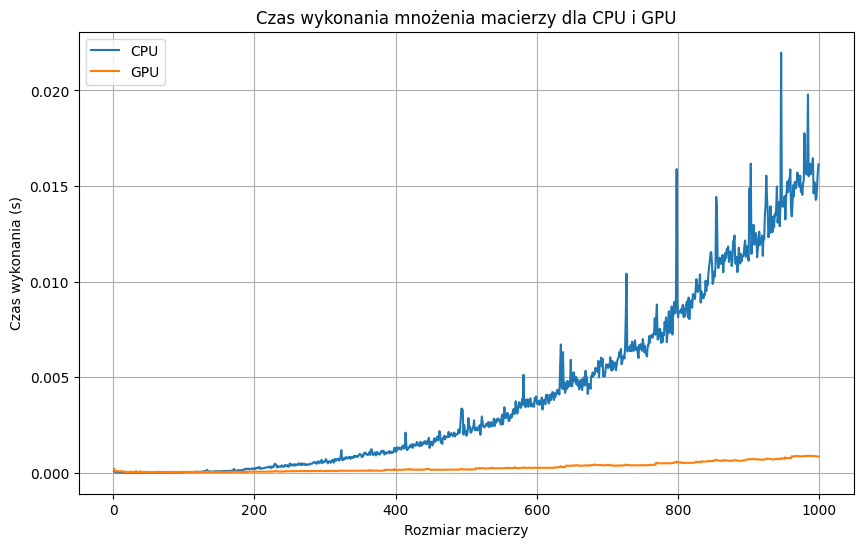

In [12]:
device_cpu = torch.device("cpu")
device_gpu = torch.device("cuda") if torch.cuda.is_available() else None

sizes = range(1, 1000)
cpu_times = []
gpu_times = []

for size in sizes:
    cpu_time = measure_time(device_cpu, size)
    cpu_times.append(cpu_time)

    if device_gpu:
        gpu_time = measure_time(device_gpu, size)
        gpu_times.append(gpu_time)
    else:
        gpu_times.append(None)


plt.figure(figsize=(10, 6))
plt.plot(sizes, cpu_times, label='CPU')
if device_gpu:
    plt.plot(sizes, gpu_times, label='GPU')

plt.xlabel('Rozmiar macierzy')
plt.ylabel('Czas wykonania (s)')
plt.title('Czas wykonania mnożenia macierzy dla CPU i GPU')
plt.legend()
plt.grid()
plt.show()


Na wykresie możemy zauważyć, że czas mnożenia dużych macierzy na GPU jest znacznie krótszy.

###Zadanie 4 (opcjonalne): Konwencja sumacyjna Einsteina
Zapisz podane operacje korzystając z konwencji sumacyjnej Einsteina.

Wyznacz ślad (suma elementów na przekątnej) macierzy `M`.

In [13]:
M = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

In [14]:
trace = torch.einsum("ii->", M)

print("Ślad macierzy M:", trace)

Ślad macierzy M: tensor(15)


In [15]:
#Oczekiwany wynik: 15

Wyznacz wartość formy biliniowej
$z = \mathbf{x}^T \mathbf{A} \mathbf{y}$

In [16]:
x = torch.tensor([1, 2])
A = torch.tensor([[3, 4], [5, 6]])
y = torch.tensor([7, 8])

In [17]:
z = torch.einsum("i,ij,j->", x, A, y)

print("Wartość formy biliniowej z:", z)

Wartość formy biliniowej z: tensor(219)


In [18]:
#Oczekiwany wynik 219

Wyznacz ważoną sumę wektorów wierszowych macierzy `V` z wagami w wektorze `w`.
$$\mathbf{z}_j = \sum_i \mathbf{w}_i \mathbf{V}_{ij}$$




In [19]:
w = torch.tensor([0.2, 0.3, 0.5])
V = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float32)  # Shape: [3, 2]

In [20]:
z = torch.einsum("i,ij->j", w, V) #-> j wynik będzie wektorem o indeksie j (suma po i)

print("Ważona suma wektorów wierszowych:", z)

Ważona suma wektorów wierszowych: tensor([3.6000, 4.6000])


In [ ]:
#Oczekiwany wynik [3.6000, 4.6000]

Dla trójwymiarowej macierzy `A` wyznacz sumę elementów po drugiej i trzeciej współrzędnej:
$$\mathbf{z}_i = \sum_{j,k} \mathbf{A}_{ijk}$$

In [21]:
A = torch.tensor(
    [[[1, 2], [3, 4], [5, 6]],
     [[2, 5], [1, 7], [1, 3]]]
    )
print(A.shape)

torch.Size([2, 3, 2])


In [22]:
z = torch.einsum("ijk->i", A)

print("Suma po drugiej i trzeciej współrzędnej:", z)

Suma po drugiej i trzeciej współrzędnej: tensor([21, 19])


In [ ]:
#Oczekiwany wynik: [21, 19]